In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import os
import datetime
from mpl_toolkits.mplot3d import Axes3D

from termcolor import colored as cl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# 資料前處理

In [4]:
df = pd.read_csv("carrefour_sales.csv")

In [5]:
df.columns=["id","order_date","product","sales_price","quantity","department","store","city","district","customer","sex","age_group"]
df['total_price'] = df['sales_price']*df['quantity']
df['order_date_notime'] = pd.to_datetime(df['order_date']).dt.floor('d')
df = df[df['quantity']>=0]
df = df[df['age_group'].notna()]

In [6]:
from sklearn.preprocessing import LabelEncoder
def labelencoding(table, n):
    map_code = pd.DataFrame()
    le = LabelEncoder()
    le.fit(table[n])
    map_code[n]=table[n]
    table[n] = le.transform(table[n])
    map_code['new_code']=table[n]
    return map_code

In [7]:
df

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
0,10eed4a6-5b6b-40d9-84fe-e7152666d2d5,2021-07-09 17:32:43,99d32476-f1eb-4af8-a7d9-28ebd8e1ce12,85,3,7ed47ad3-61a2-423c-937b-c23bf4ad05f3,38177bc5-93b3-4b7a-ad27-d6aa162ccc9a,0ced232a-ba28-4238-8411-264c228aa751,de4598ec-8318-4e21-8e0a-510a49853a07,53867ee1-e97b-44c3-810b-cc0de8f49217,NaN,1.0,255,2021-07-09
1,b7cf4711-f248-4a12-8bb6-d7a330faac5e,2021-07-06 23:46:09,c54bcaef-b3b9-4601-a5da-8519d33d3b81,89,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,3f6de5e8-3b20-4237-89dc-ee4eff7625a3,08955352-31a8-44ac-8a5e-e13de23db4a2,df5f2a7b-ec52-4505-bd85-26a84438dee0,52eb5d34-a34b-4f29-9d83-e23d48d1e03b,NaN,1.0,89,2021-07-06
2,0b16dd32-838f-4948-bd95-916d7b1a0a42,2021-02-01 15:06:29,abad439e-5bc0-4097-82e8-e87f0cb057ff,64,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,68e916ca-f999-4e5a-9c34-f277f9bc2867,8c4f97b5-e3c1-4279-9829-ee56f920c12b,2b9626af-4919-45e4-873b-4a07a9749421,dbf9be47-c8e9-4fee-b92d-727f68afab96,NaN,1.0,64,2021-02-01
3,a4998917-ae04-45e4-a5fe-4dc4a1fa4b35,2021-01-12 20:40:10,fc007164-7f6e-4833-9e36-e141c3fb4fe6,75,1,22f2e7c7-6679-41fd-9c1d-6e9562b51bce,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,8e5145fd-9b3e-448d-b22e-a81991161656,NaN,8.0,75,2021-01-12
4,a30dca13-d325-4a0c-a8fa-fb2ba762ad93,2021-07-05 00:03:59,f1fc2f7e-2aaa-484d-be31-8369b609cab0,75,2,451ffc74-a780-4ae0-adba-ff8caa8f4b91,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.0,150,2021-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362457,5867bdad-9694-4467-a0bc-16e033229001,2020-05-09 03:33:54,4fca0aee-1e50-4269-825a-593d048c1505,149,1,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,74ba5ee0-dbab-4076-8d5c-817457907b10,NaN,4.0,149,2020-05-09
17362458,64207f8c-72be-46ee-ac80-8d3df7ded23f,2020-06-05 19:07:14,f95661c9-5e74-4175-83f8-c17c32f79295,0,1,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,b8de3c4d-b56f-42b7-88fd-c8b6c50f80f3,B,4.0,0,2020-06-05
17362459,c2ff56cc-09d0-4fb3-86a9-1c1d389238b3,2020-06-01 10:29:28,727fa7bc-7ff7-4fea-a988-c4f7fce68655,119,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,0b2331d4-1d32-4e1b-b18f-4587f879eebf,A,4.0,238,2020-06-01
17362460,62ae6ac2-8cbf-40ff-a1c5-dba9fcbd430b,2021-03-02 00:03:21,39cc3ff3-74b2-45a0-a3e0-2e01d3f96c68,39,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,0319a423-6e73-4be0-b9b3-e69df7f57cbc,NaN,2.0,78,2021-03-02


In [8]:
def checkunique(n):
    return df[n].unique()
checkunique('sex')

array([nan, 'A', 'B'], dtype=object)

In [9]:
minvalue = df.min()
minvalue

id                   0000028e-ff8f-471e-87ae-47024cb4e13f
order_date                            2020-04-29 00:00:39
product              0000c0d2-9ab6-42be-9ac9-f4dde5502019
sales_price                                             0
quantity                                                0
department           040ad82b-9260-4168-a8ec-cc73ca18c1c3
store                025c6e08-592c-4f3d-8a9e-6d6b685fef33
city                 03de1a9a-d2cb-479b-8754-586c55ca33ca
district             12ef2c2c-a649-4f02-8796-5444ab19897c
customer             00001f06-ae9a-4063-a22d-fd7754c89d74
age_group                                               0
total_price                                             0
order_date_notime                     2020-04-29 00:00:00
dtype: object

In [10]:
missing_values_count = df.isnull().sum()
missing_values_count[:10]

id             0
order_date     0
product        0
sales_price    0
quantity       0
department     0
store          0
city           0
district       0
customer       0
dtype: int64

In [11]:
df.shape

(16507519, 14)

In [12]:
checkunique('age_group')

array([ 1.,  8.,  0.,  9., 11., 12., 10.,  2.,  3.,  4.,  5.,  6.,  7.])

In [13]:
def countvalue(n):
    return df[n].value_counts()

In [14]:
ls = ['id','product','department','store', 'city', 'district', 'customer']
for i in ls:
    i = labelencoding(df,i)
    print(i)

                                            id  new_code
0         10eed4a6-5b6b-40d9-84fe-e7152666d2d5    120917
1         b7cf4711-f248-4a12-8bb6-d7a330faac5e   1317176
2         0b16dd32-838f-4948-bd95-916d7b1a0a42     79508
3         a4998917-ae04-45e4-a5fe-4dc4a1fa4b35   1179518
4         a30dca13-d325-4a0c-a8fa-fb2ba762ad93   1168465
...                                        ...       ...
17362457  5867bdad-9694-4467-a0bc-16e033229001    633659
17362458  64207f8c-72be-46ee-ac80-8d3df7ded23f    717303
17362459  c2ff56cc-09d0-4fb3-86a9-1c1d389238b3   1397535
17362460  62ae6ac2-8cbf-40ff-a1c5-dba9fcbd430b    707135
17362461  0eb02a98-0a69-46b1-864d-591dbbdad2d5    105016

[16507519 rows x 2 columns]
                                       product  new_code
0         99d32476-f1eb-4af8-a7d9-28ebd8e1ce12     24181
1         c54bcaef-b3b9-4601-a5da-8519d33d3b81     31114
2         abad439e-5bc0-4097-82e8-e87f0cb057ff     27043
3         fc007164-7f6e-4833-9e36-e141c3fb4fe6     39803
4 

In [15]:
df

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
0,120917,2021-07-09 17:32:43,24181,85,3,15,17,2,56,62990,NaN,1.0,255,2021-07-09
1,1317176,2021-07-06 23:46:09,31114,89,1,27,25,1,57,62514,NaN,1.0,89,2021-07-06
2,79508,2021-02-01 15:06:29,27043,64,1,27,42,9,9,165955,NaN,1.0,64,2021-02-01
3,1179518,2021-01-12 20:40:10,39803,75,1,2,0,5,35,107415,NaN,8.0,75,2021-01-12
4,1168465,2021-07-05 00:03:59,38208,75,2,6,0,5,35,140371,NaN,8.0,150,2021-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362457,633659,2020-05-09 03:33:54,12535,149,1,29,107,4,0,88210,NaN,4.0,149,2020-05-09
17362458,717303,2020-06-05 19:07:14,39370,0,1,29,107,4,0,139427,B,4.0,0,2020-06-05
17362459,1397535,2020-06-01 10:29:28,18026,119,2,29,107,4,0,8203,A,4.0,238,2020-06-01
17362460,707135,2021-03-02 00:03:21,9139,39,2,29,107,4,0,2365,NaN,2.0,78,2021-03-02


In [16]:
for i in df.columns:
    num = str(len(checkunique(i)))
    print("%s: %s" %(i, num))

id: 1833193
order_date: 1775582
product: 40410
sales_price: 2106
quantity: 263
department: 30
store: 110
city: 17
district: 67
customer: 193254
sex: 3
age_group: 13
total_price: 4940
order_date_notime: 612


In [15]:
#df.to_csv('clean.csv',sep=',',index=False,header=True)

# 單位時間的銷售額去觀察

由於大部分產品的銷量不多，因此以此為角度去進行預測不太適合  
先以日為單位去觀察較為適合
https://ithelp.ithome.com.tw/articles/10235251

In [17]:
Price_time=df[['total_price','order_date_notime']]
aaa = pd.DataFrame()
aaa['total_price'] = Price_time.groupby(['order_date_notime'])['total_price'].sum()
aaa

,total_price
order_date_notime,
2020-04-29,3464162
2020-04-30,2453614
2020-05-01,2787318
2020-05-02,2481164
2020-05-03,2986071
...,...
2021-12-27,2876638
2021-12-28,1705188
2021-12-29,2374620


<BarContainer object of 612 artists>

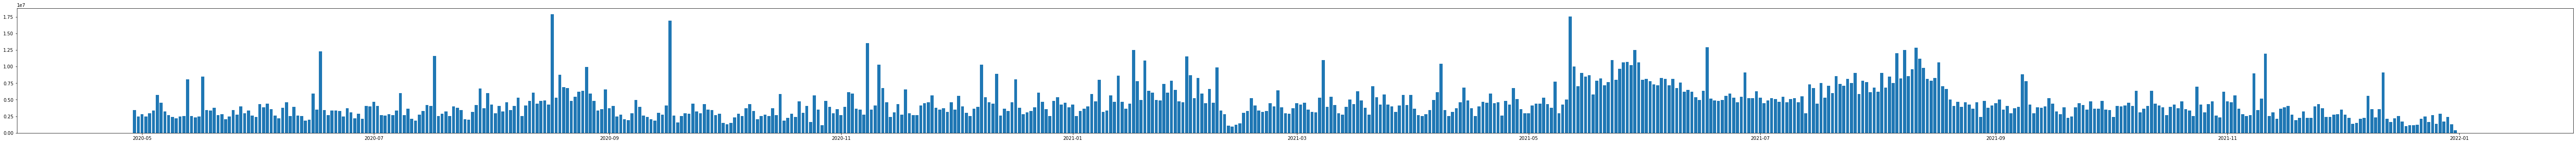

In [18]:
plt.figure(figsize=[100,5])
plt.bar(aaa.index,aaa['total_price'])

In [19]:
bbb = aaa.sort_values(by = ['total_price'],ascending=False)
ccc = bbb[bbb>bbb.quantile(0.98)].dropna()
ccc

,total_price
order_date_notime,
2020-08-17,17899937.0
2021-05-12,17554083.0
2020-09-17,16959809.0
2020-11-08,13531202.0
2021-06-17,12905262.0
2021-08-11,12854144.0
2021-08-08,12535583.0
2021-05-29,12521499.0
2021-01-17,12475040.0


<BarContainer object of 13 artists>

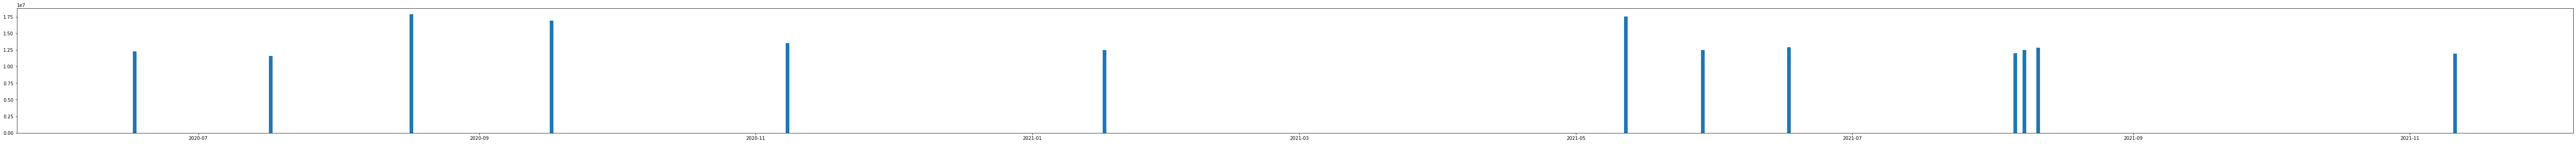

In [20]:
plt.figure(figsize=[100,5])
plt.bar(ccc.index,ccc['total_price'])

In [21]:
ccc['order_date_notime'] =ccc.index
ccc.to_csv('specialday13.csv',sep=',',index=False,header=True)

<BarContainer object of 80 artists>

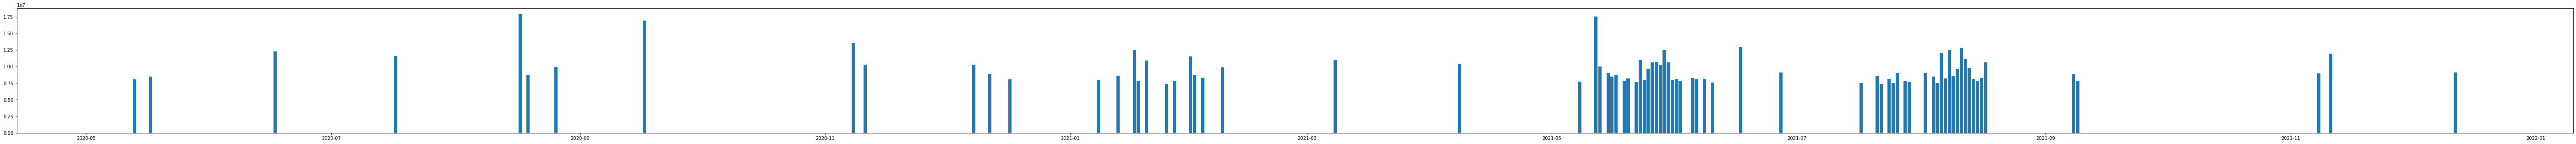

In [22]:
plt.figure(figsize=[100,5])
ddd=bbb[bbb>bbb.quantile(0.87)].dropna()
plt.bar(ddd.index,ddd['total_price'])

In [23]:
ddd

,total_price
order_date_notime,
2020-08-17,17899937.0
2021-05-12,17554083.0
2020-09-17,16959809.0
2020-11-08,13531202.0
2021-06-17,12905262.0
...,...
2021-08-05,7557173.0
2021-07-25,7552948.0
2021-07-17,7507892.0


In [24]:
ddd['order_date_notime'] = ddd.index

In [25]:
ddd

,total_price,order_date_notime
order_date_notime,,
2020-08-17,17899937.0,2020-08-17
2021-05-12,17554083.0,2021-05-12
2020-09-17,16959809.0,2020-09-17
2020-11-08,13531202.0,2020-11-08
2021-06-17,12905262.0,2021-06-17
...,...,...
2021-08-05,7557173.0,2021-08-05
2021-07-25,7552948.0,2021-07-25
2021-07-17,7507892.0,2021-07-17


In [26]:
ddd.to_csv('specialdaylist.csv',sep=',',index=False,header=True)

In [27]:
ddd.index

DatetimeIndex(['2020-08-17', '2021-05-12', '2020-09-17', '2020-11-08',
               '2021-06-17', '2021-08-11', '2021-08-08', '2021-05-29',
               '2021-01-17', '2020-06-17', '2021-08-06', '2021-11-11',
               '2020-07-17', '2021-01-31', '2021-08-12', '2021-03-08',
               '2021-05-23', '2021-01-20', '2021-05-27', '2021-05-30',
               '2021-05-26', '2021-08-17', '2021-04-08', '2020-12-08',
               '2020-11-11', '2021-05-28', '2021-05-13', '2020-08-26',
               '2021-02-08', '2021-08-13', '2021-05-25', '2021-08-10',
               '2021-12-12', '2021-06-27', '2021-07-26', '2021-05-15',
               '2021-08-02', '2021-11-08', '2020-12-12', '2021-09-08',
               '2020-08-19', '2021-05-17', '2021-02-01', '2021-01-13',
               '2021-08-09', '2021-07-21', '2020-05-17', '2021-08-04',
               '2021-05-16', '2021-06-05', '2021-08-16', '2021-02-03',
               '2021-05-20', '2021-08-07', '2021-07-24', '2021-06-01',
      

# 1.找出特殊節日

In [28]:
special_time_sort=ccc.sort_values(by=['total_price'])

In [29]:
special_time_sort

,total_price,order_date_notime
order_date_notime,,
2020-07-17,11599682.0,2020-07-17
2021-11-11,11938691.0,2021-11-11
2021-08-06,12044533.0,2021-08-06
2020-06-17,12296593.0,2020-06-17
2021-01-17,12475040.0,2021-01-17
2021-05-29,12521499.0,2021-05-29
2021-08-08,12535583.0,2021-08-08
2021-08-11,12854144.0,2021-08-11
2021-06-17,12905262.0,2021-06-17


In [30]:
len(special_time_sort)

13

In [28]:
special_time_sort.index

DatetimeIndex(['2020-07-17', '2021-11-11', '2021-08-06', '2020-06-17',
               '2021-01-17', '2021-05-29', '2021-08-08', '2021-08-11',
               '2021-06-17', '2020-11-08', '2020-09-17', '2021-05-12',
               '2020-08-17'],
              dtype='datetime64[ns]', name='order_date_notime', freq=None)

In [33]:
august8th_2022=[]
for i in range(-15,15):
    august = ccc.index[6] + datetime.timedelta(days = int(i))
    august8th_2022.append(august)
        #if same_festival not in special_time_sort.index:
            #no_repeat.append(same_festival)
      #special_time_sort.index.remove(same_festival)
      #print(trytry)
      #print(len(trytry))

In [37]:
august8th_2022

[Timestamp('2021-07-24 00:00:00'),
 Timestamp('2021-07-25 00:00:00'),
 Timestamp('2021-07-26 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-07-28 00:00:00'),
 Timestamp('2021-07-29 00:00:00'),
 Timestamp('2021-07-30 00:00:00'),
 Timestamp('2021-07-31 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-08-02 00:00:00'),
 Timestamp('2021-08-03 00:00:00'),
 Timestamp('2021-08-04 00:00:00'),
 Timestamp('2021-08-05 00:00:00'),
 Timestamp('2021-08-06 00:00:00'),
 Timestamp('2021-08-07 00:00:00'),
 Timestamp('2021-08-08 00:00:00'),
 Timestamp('2021-08-09 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-08-11 00:00:00'),
 Timestamp('2021-08-12 00:00:00'),
 Timestamp('2021-08-13 00:00:00'),
 Timestamp('2021-08-14 00:00:00'),
 Timestamp('2021-08-15 00:00:00'),
 Timestamp('2021-08-16 00:00:00'),
 Timestamp('2021-08-17 00:00:00'),
 Timestamp('2021-08-18 00:00:00'),
 Timestamp('2021-08-19 00:00:00'),
 Timestamp('2021-08-20 00:00:00'),
 Timestamp('2021-08-

In [38]:
May12th_2022=[]
for i in range(-7,23):
    may = ccc.index[11] + datetime.timedelta(days = int(i))
    May12th_2022.append(may)

In [39]:
May12th_2022

[Timestamp('2021-11-04 00:00:00'),
 Timestamp('2021-11-05 00:00:00'),
 Timestamp('2021-11-06 00:00:00'),
 Timestamp('2021-11-07 00:00:00'),
 Timestamp('2021-11-08 00:00:00'),
 Timestamp('2021-11-09 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-11 00:00:00'),
 Timestamp('2021-11-12 00:00:00'),
 Timestamp('2021-11-13 00:00:00'),
 Timestamp('2021-11-14 00:00:00'),
 Timestamp('2021-11-15 00:00:00'),
 Timestamp('2021-11-16 00:00:00'),
 Timestamp('2021-11-17 00:00:00'),
 Timestamp('2021-11-18 00:00:00'),
 Timestamp('2021-11-19 00:00:00'),
 Timestamp('2021-11-20 00:00:00'),
 Timestamp('2021-11-21 00:00:00'),
 Timestamp('2021-11-22 00:00:00'),
 Timestamp('2021-11-23 00:00:00'),
 Timestamp('2021-11-24 00:00:00'),
 Timestamp('2021-11-25 00:00:00'),
 Timestamp('2021-11-26 00:00:00'),
 Timestamp('2021-11-27 00:00:00'),
 Timestamp('2021-11-28 00:00:00'),
 Timestamp('2021-11-29 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2021-12-

In [40]:
no_repeat=[]
for j in range (13):
    #for i in range(-7,7):
    same_festival = ccc.index[j] #+ datetime.timedelta(days = int(i))
    no_repeat.append(same_festival)
        #if same_festival not in special_time_sort.index:
            #no_repeat.append(same_festival)
      #special_time_sort.index.remove(same_festival)
      #print(trytry)
      #print(len(trytry))


In [41]:
no_repeat

[Timestamp('2020-08-17 00:00:00'),
 Timestamp('2021-05-12 00:00:00'),
 Timestamp('2020-09-17 00:00:00'),
 Timestamp('2020-11-08 00:00:00'),
 Timestamp('2021-06-17 00:00:00'),
 Timestamp('2021-08-11 00:00:00'),
 Timestamp('2021-08-08 00:00:00'),
 Timestamp('2021-05-29 00:00:00'),
 Timestamp('2021-01-17 00:00:00'),
 Timestamp('2020-06-17 00:00:00'),
 Timestamp('2021-08-06 00:00:00'),
 Timestamp('2021-11-11 00:00:00'),
 Timestamp('2020-07-17 00:00:00')]

In [42]:
len(no_repeat)

13

In [43]:
no_repeat[0]

Timestamp('2020-08-17 00:00:00')

In [44]:
df['order_date_notime']

0          2021-07-09
1          2021-07-06
2          2021-02-01
3          2021-01-12
4          2021-07-05
              ...    
17362457   2020-05-09
17362458   2020-06-05
17362459   2020-06-01
17362460   2021-03-02
17362461   2021-06-11
Name: order_date_notime, Length: 16507519, dtype: datetime64[ns]

In [45]:
for i in range (len(no_repeat)):
    globals()['festival'+str(i)] = df['order_date_notime'] == no_repeat[i]

In [46]:
df[festival1]

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
454,1544760,2021-05-12 11:17:16,16461,109,1,27,5,7,8,147302,NaN,9.0,109,2021-05-12
536,255247,2021-05-12 19:08:14,1250,43,1,6,5,7,8,79246,NaN,8.0,43,2021-05-12
570,1721572,2021-05-12 20:05:11,39689,35,1,23,5,7,8,78396,NaN,8.0,35,2021-05-12
802,376274,2021-05-12 17:44:50,20184,168,1,29,8,7,1,30925,A,1.0,168,2021-05-12
1682,1312140,2021-05-12 16:15:22,4304,18,1,23,22,13,46,46339,NaN,1.0,18,2021-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17361769,838813,2021-05-12 14:30:14,9105,79,2,29,105,7,54,94619,NaN,2.0,158,2021-05-12
17361978,204314,2021-05-12 13:48:37,5063,203,1,29,105,7,54,85909,NaN,3.0,203,2021-05-12
17362008,1349979,2021-05-12 15:20:26,23397,365,1,29,105,7,54,166753,A,4.0,365,2021-05-12
17362048,967768,2021-05-12 15:18:12,14616,120,1,29,105,7,54,99887,NaN,5.0,120,2021-05-12


In [47]:
festival_1st=df[festival1]

In [48]:
sell=festival_1st[['product','quantity']]
sell

,product,quantity
454,16461,1
536,1250,1
570,39689,1
802,20184,1
1682,4304,1
...,...,...
17361769,9105,2
17361978,5063,1
17362008,23397,1
17362048,14616,1


In [49]:
sell=festival_1st[['product','quantity']]
sell

,product,quantity
454,16461,1
536,1250,1
570,39689,1
802,20184,1
1682,4304,1
...,...,...
17361769,9105,2
17361978,5063,1
17362008,23397,1
17362048,14616,1


In [50]:
sell['product'].duplicated()

454         False
536         False
570         False
802         False
1682        False
            ...  
17361769     True
17361978     True
17362008     True
17362048     True
17362051     True
Name: product, Length: 107667, dtype: bool

In [51]:
sell_amount1= pd.DataFrame()
sell_amount1['quantity']=sell.groupby(['product'])['quantity'].sum()
sell_amount1

#aaa = pd.DataFrame()
#aaa['total_price'] = Price_time.groupby(['order_date_notime'])['total_price'].sum()
#aa

,quantity
product,
3,2
8,47
13,2
14,2
15,13
...,...
40394,1
40397,3
40406,26


In [41]:
#product商品編號 quantity數量
#https://reata.github.io/blog/kaggle-instacart-market-basket-analysis-retrospect/

<AxesSubplot:xlabel='product'>

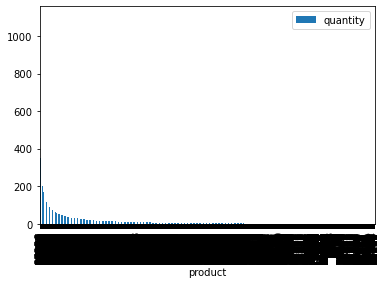

In [52]:
festival_0=df[festival0]
sell0=festival_0[['product','quantity']]
sell_amount0= pd.DataFrame() 
sell_amount0['quantity']=sell0.groupby(['product'])['quantity'].sum()
sell_amount0 = sell_amount0.sort_values(by = ['quantity'],ascending=False)
#plt.bar(sell_amount0.index, sell_amount0['quantity'])
sell_amount0.plot(kind="bar")

<AxesSubplot:xlabel='product'>

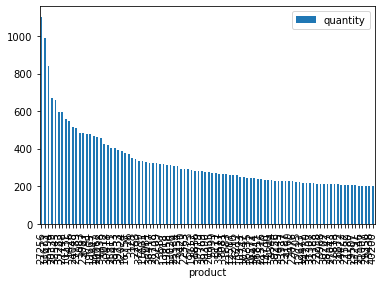

In [131]:
fes0 = sell_amount0[sell_amount0>200].dropna()
fes0.plot(kind="bar")

In [44]:
len(fes0)

96

<AxesSubplot:xlabel='product'>

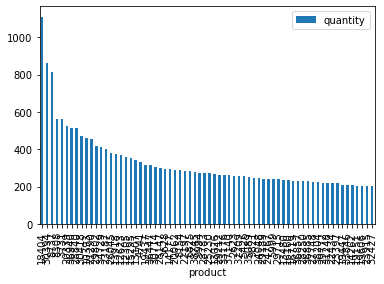

In [45]:
fes1 = sell_amount1[sell_amount1>200].dropna()
fes1 = fes1.sort_values(by = ['quantity'],ascending=False)
fes1.plot(kind="bar")

In [46]:
len(fes1)

68

<AxesSubplot:xlabel='product'>

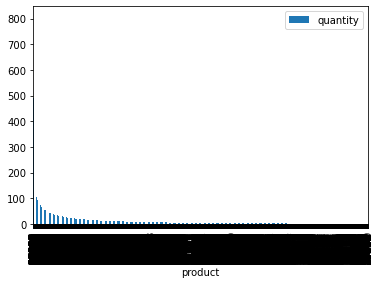

In [47]:
festival_2=df[festival2]
sell2=festival_2[['product','quantity']]
sell_amount2= pd.DataFrame()
sell_amount2['quantity']=sell2.groupby(['product'])['quantity'].sum()
sell_amount2 = sell_amount2.sort_values(by = ['quantity'],ascending=False)
sell_amount2.plot(kind="bar")

<AxesSubplot:xlabel='product'>

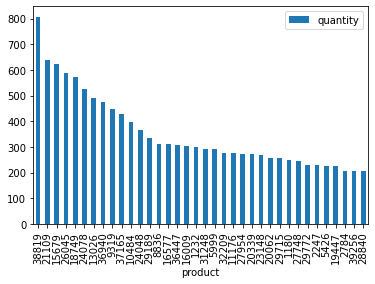

In [48]:
fes2 = sell_amount2[sell_amount2>200].dropna()
fes2.plot(kind="bar")

<AxesSubplot:xlabel='product'>

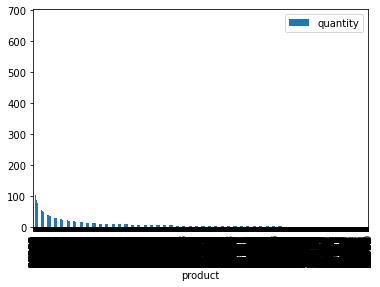

In [49]:
festival_3=df[festival3]
sell3=festival_3[['product','quantity']]
sell_amount3= pd.DataFrame()
sell_amount3['quantity']=sell3.groupby(['product'])['quantity'].sum()
sell_amount3 = sell_amount3.sort_values(by = ['quantity'],ascending=False)
#plt.bar(sell_amount3.index, sell_amount3['quantity'])
sell_amount3.plot(kind="bar")

<AxesSubplot:xlabel='product'>

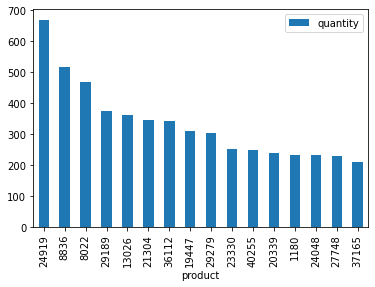

In [50]:
#較適合找出高價值商品
fes3 = sell_amount3[sell_amount3>200].dropna()
fes3.plot(kind="bar")

In [51]:
fes3

,quantity
product,
24919,669.0
8836,517.0
8022,467.0
29189,373.0
13026,361.0
21304,344.0
36112,342.0
19447,309.0
29279,302.0


<AxesSubplot:xlabel='product'>

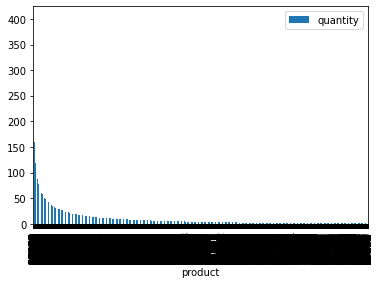

In [52]:
festival_4=df[festival4]
sell4=festival_4[['product','quantity']]
sell_amount4= pd.DataFrame()
sell_amount4['quantity']=sell4.groupby(['product'])['quantity'].sum()
sell_amount4 = sell_amount4.sort_values(by = ['quantity'],ascending=False)
#plt.bar(sell_amount4.index, sell_amount4['quantity'])
sell_amount4.plot(kind="bar")

<AxesSubplot:xlabel='product'>

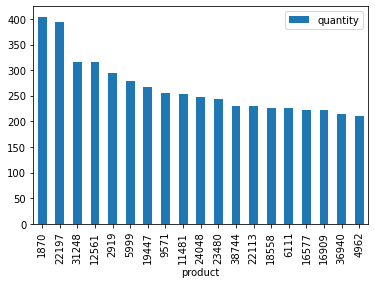

In [53]:
fes4 = sell_amount4[sell_amount4>200].dropna()
fes4.plot(kind="bar")

<AxesSubplot:xlabel='product'>

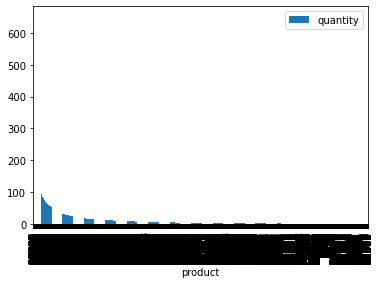

In [54]:
festival_5=df[festival5]
sell5=festival_5[['product','quantity']]
sell_amount5= pd.DataFrame()
sell_amount5['quantity']=sell5.groupby(['product'])['quantity'].sum()
sell_amount5 = sell_amount5.sort_values(by = ['quantity'],ascending=False)
#plt.bar(sell_amount5.index, sell_amount5['quantity'])
sell_amount5.plot(kind="bar")

<AxesSubplot:xlabel='product'>

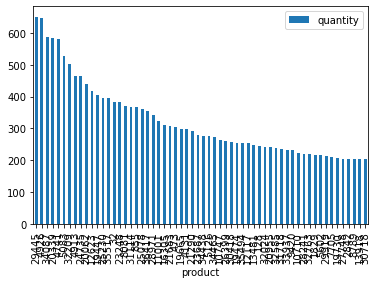

In [55]:
fes5 = sell_amount5[sell_amount5>200].dropna()
fes5.plot(kind="bar")

<AxesSubplot:xlabel='product'>

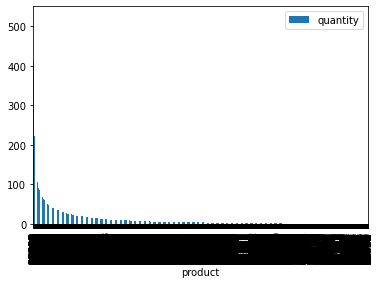

In [56]:
festival_6=df[festival6]
sell6=festival_6[['product','quantity']]
sell_amount6= pd.DataFrame()
sell_amount6['quantity']=sell6.groupby(['product'])['quantity'].sum()
sell_amount6 = sell_amount6.sort_values(by = ['quantity'],ascending=False)
#plt.bar(sell_amount6.index, sell_amount6['quantity'])
sell_amount6.plot(kind="bar")


<AxesSubplot:xlabel='product'>

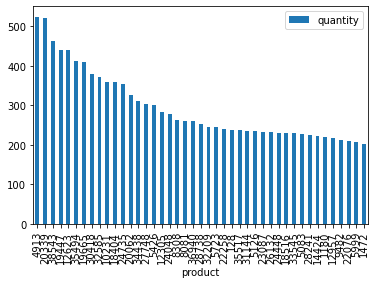

In [57]:
fes6 = sell_amount6[sell_amount6>200].dropna()
fes6.plot(kind="bar")

<AxesSubplot:xlabel='product'>

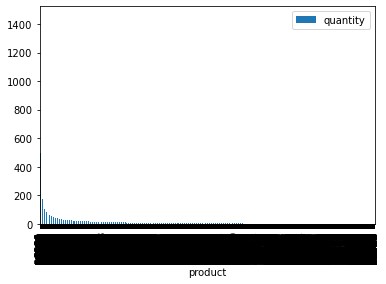

In [70]:
festival_7=df[festival7]
sell7=festival_7[['product','quantity']]
sell_amount7= pd.DataFrame()
sell_amount7['quantity']=sell7.groupby(['product'])['quantity'].sum()
sell_amount7 = sell_amount7.sort_values(by = ['quantity'],ascending=False)

sell_amount7.plot(kind="bar")
#plt.bar(sell_amount7.index, sell_amount7['quantity'])

<AxesSubplot:xlabel='product'>

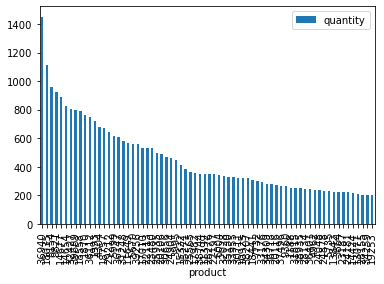

In [71]:
fes7 = sell_amount7[sell_amount7>200].dropna()
fes7.plot(kind="bar")

<AxesSubplot:xlabel='product'>

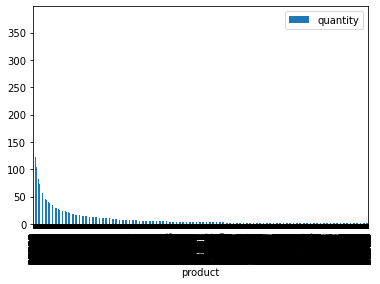

In [72]:
festival_8=df[festival8]
sell8=festival_8[['product','quantity']]
sell_amount8= pd.DataFrame()
sell_amount8['quantity']=sell8.groupby(['product'])['quantity'].sum()
sell_amount8 = sell_amount8.sort_values(by = ['quantity'],ascending=False)
#plt.bar(sell_amount8.index, sell_amount8['quantity'])]
sell_amount8.plot(kind="bar")

<AxesSubplot:xlabel='product'>

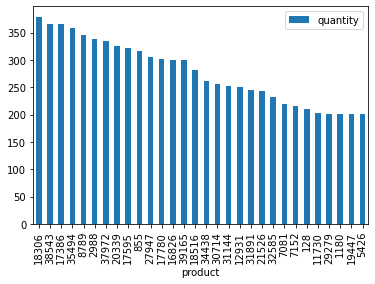

In [73]:
fes8 = sell_amount8[sell_amount8>200].dropna()
fes8.plot(kind="bar")

<AxesSubplot:xlabel='product'>

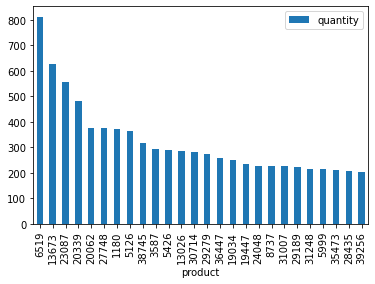

In [74]:
festival_9=df[festival9]
sell9=festival_9[['product','quantity']]
sell_amount9= pd.DataFrame()
sell_amount9['quantity']=sell9.groupby(['product'])['quantity'].sum()
sell_amount9 = sell_amount9.sort_values(by = ['quantity'],ascending=False)
fes9 = sell_amount9[sell_amount9>200].dropna()
fes9.plot(kind="bar")

<AxesSubplot:xlabel='product'>

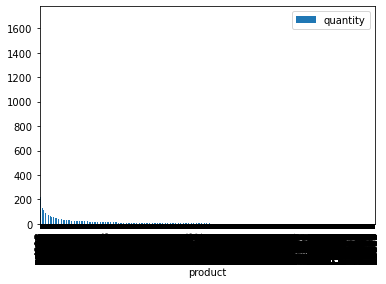

In [75]:
festival_10=df[festival10]
sell10=festival_10[['product','quantity']]
sell_amount10= pd.DataFrame()
sell_amount10['quantity']=sell10.groupby(['product'])['quantity'].sum()
sell_amount10 = sell_amount10.sort_values(by = ['quantity'],ascending=False)

#plt.bar(sell_amount10.index, sell_amount10['quantity'])
sell_amount10.plot(kind="bar")

<AxesSubplot:xlabel='product'>

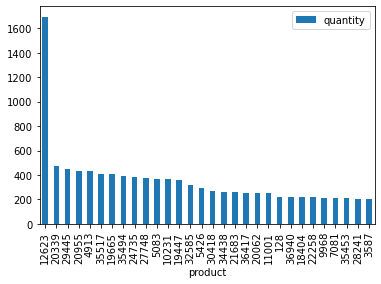

In [76]:
fes10 = sell_amount10[sell_amount10>200].dropna()
fes10.plot(kind="bar")

<AxesSubplot:xlabel='product'>

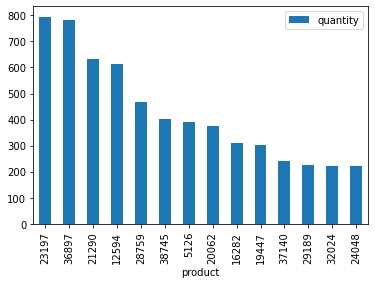

In [77]:
festival_11=df[festival11]
sell11=festival_11[['product','quantity']]
sell_amount11= pd.DataFrame()
sell_amount11['quantity']=sell11.groupby(['product'])['quantity'].sum()
sell_amount11 = sell_amount11.sort_values(by = ['quantity'],ascending=False)
fes11 = sell_amount11[sell_amount11>200].dropna()
fes11.plot(kind="bar")

<AxesSubplot:xlabel='product'>

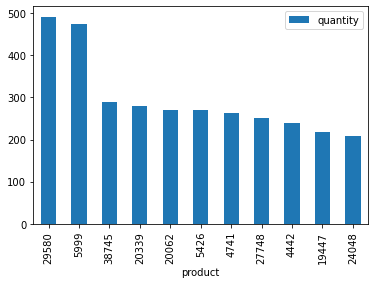

In [78]:
festival_12=df[festival12]
sell12=festival_12[['product','quantity']]
sell_amount12= pd.DataFrame()
sell_amount12['quantity']=sell12.groupby(['product'])['quantity'].sum()
sell_amount12 = sell_amount12.sort_values(by = ['quantity'],ascending=False)
fes12 = sell_amount12[sell_amount12>200].dropna()
fes12.plot(kind="bar")

# 各節日重點商品

In [79]:
festival_0

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
57,392418,2020-08-17 22:04:26,20349,52,1,27,69,14,30,78775,NaN,8.0,52,2020-08-17
527,379620,2020-08-17 00:16:59,16605,68,1,6,5,7,8,186601,NaN,11.0,68,2020-08-17
678,773499,2020-08-17 11:45:56,17881,579,1,27,5,7,8,148172,A,0.0,579,2020-08-17
804,1239384,2020-08-17 22:50:19,39817,99,1,6,8,7,1,180466,NaN,11.0,99,2020-08-17
1125,226839,2020-08-17 18:34:20,18293,33,2,17,8,7,1,180466,NaN,11.0,66,2020-08-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17361183,1573846,2020-08-17 19:31:37,17445,199,1,29,105,7,54,33023,NaN,4.0,199,2020-08-17
17361242,1110745,2020-08-17 23:44:41,15303,84,1,29,105,7,54,89622,NaN,3.0,84,2020-08-17
17361539,1021342,2020-08-17 12:00:33,37857,118,1,29,105,7,54,175127,NaN,5.0,118,2020-08-17
17361619,1666655,2020-08-17 09:42:57,7158,569,1,29,105,7,54,146937,NaN,5.0,569,2020-08-17


In [132]:
fes0['product'] = fes0.index
fes0

,quantity,product
product,,
27256,1102.0,27256
13673,992.0,13673
35494,842.0,35494
20339,671.0,20339
33545,660.0,33545
...,...,...
25146,204.0,25146
31007,203.0,31007
29350,202.0,29350


In [145]:
fes0ori=fes0.drop(['product'], axis=1)
fes0ori

,quantity
product,
27256,1102.0
13673,992.0
35494,842.0
20339,671.0
33545,660.0
...,...
25146,204.0
31007,203.0
29350,202.0


In [146]:
sell0_ps_hs=festival_0[['product','sales_price']]
sell0_ps_hs=sell0_ps_hs.drop_duplicates(['product'])
sell0_ps_hs

,product,sales_price
57,20349,52
527,16605,68
678,17881,579
804,39817,99
1125,18293,33
...,...,...
17348258,14767,369
17349743,27926,89
17359599,27561,75
17360105,13493,175


In [147]:
fes0ori = fes0ori.merge(sell0_ps_hs, on='product')
#fes0ori= fes0ori.sort_values(by = ['sales_price'],ascending=False)
fes0ori

,product,quantity,sales_price
0,27256,1102.0,0
1,13673,992.0,0
2,35494,842.0,88
3,20339,671.0,64
4,33545,660.0,95
...,...,...,...
91,25146,204.0,49
92,31007,203.0,30
93,29350,202.0,0
94,9438,202.0,92


In [148]:
fes0ori.to_csv('20200817_lowcosthighsell.csv',sep=',',index=False,header=True)

In [121]:
df[festival1]

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
454,1544760,2021-05-12 11:17:16,16461,109,1,27,5,7,8,147302,NaN,9.0,109,2021-05-12
536,255247,2021-05-12 19:08:14,1250,43,1,6,5,7,8,79246,NaN,8.0,43,2021-05-12
570,1721572,2021-05-12 20:05:11,39689,35,1,23,5,7,8,78396,NaN,8.0,35,2021-05-12
802,376274,2021-05-12 17:44:50,20184,168,1,29,8,7,1,30925,A,1.0,168,2021-05-12
1682,1312140,2021-05-12 16:15:22,4304,18,1,23,22,13,46,46339,NaN,1.0,18,2021-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17361769,838813,2021-05-12 14:30:14,9105,79,2,29,105,7,54,94619,NaN,2.0,158,2021-05-12
17361978,204314,2021-05-12 13:48:37,5063,203,1,29,105,7,54,85909,NaN,3.0,203,2021-05-12
17362008,1349979,2021-05-12 15:20:26,23397,365,1,29,105,7,54,166753,A,4.0,365,2021-05-12
17362048,967768,2021-05-12 15:18:12,14616,120,1,29,105,7,54,99887,NaN,5.0,120,2021-05-12


In [149]:
sell1_ps_hs=festival_1[['product','sales_price']]
sell1_ps_hs=sell1_ps_hs.drop_duplicates(['product'])
sell1_ps_hs

,product,sales_price
454,16461,109
536,1250,43
570,39689,35
802,20184,168
1682,4304,18
...,...,...
17356507,20365,371
17357722,20194,349
17359503,2262,129
17360268,25947,100


In [150]:
fes1['product'] = fes1.index
fes1=fes1.drop(['product'], axis=1)
#fes1 = fes1.merge(sell1_ps_hs, on='product')
fes1

,quantity
product,
18404,1109.0
30394,860.0
8737,812.0
8308,562.0
3731,560.0
...,...
14262,207.0
19151,205.0
19606,204.0


In [151]:
fes1 = fes1.merge(sell1_ps_hs, on='product')
#fes0ori= fes0ori.sort_values(by = ['sales_price'],ascending=False)
fes1

,product,quantity,sales_price
0,18404,1109.0,318
1,30394,860.0,49
2,8737,812.0,0
3,8308,562.0,175
4,3731,560.0,199
...,...,...,...
63,14262,207.0,169
64,19151,205.0,86
65,19606,204.0,85
66,23915,203.0,33


In [152]:
fes1.to_csv('20210512_lowcosthighsell.csv',sep=',',index=False,header=True)

In [124]:
festival_2

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
14,1688282,2020-09-17 11:19:50,9319,0,1,6,100,0,48,78775,NaN,8.0,0,2020-09-17
28,1688282,2020-09-17 11:19:50,979,36,1,6,100,0,48,78775,NaN,8.0,36,2020-09-17
447,1681614,2020-09-17 11:33:53,7133,36,1,27,5,7,8,48241,NaN,8.0,36,2020-09-17
1306,1528038,2020-09-17 11:12:33,9074,58,1,6,12,0,51,84935,NaN,1.0,58,2020-09-17
1350,1487931,2020-09-17 11:24:34,31248,85,9,15,12,0,51,84935,NaN,1.0,765,2020-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17360982,650245,2020-09-17 14:30:46,33989,49,1,29,105,7,54,13395,NaN,5.0,49,2020-09-17
17361046,710664,2020-09-17 14:32:50,26521,78,1,29,105,7,54,102342,NaN,6.0,78,2020-09-17
17361438,1105022,2020-09-17 19:37:28,18749,149,1,29,105,7,54,98534,NaN,4.0,149,2020-09-17
17361912,1105022,2020-09-17 19:37:28,13480,106,3,29,105,7,54,98534,NaN,4.0,318,2020-09-17


In [153]:
sell2_ps_hs=festival_2[['product','sales_price']]
sell2_ps_hs=sell2_ps_hs.drop_duplicates(['product'])
sell2_ps_hs

,product,sales_price
14,9319,0
28,979,36
447,7133,36
1306,9074,58
1350,31248,85
...,...,...
17348548,33185,229
17357104,5922,126
17357110,39567,299
17357505,14924,149


In [154]:
fes2['product'] = fes2.index
fes2=fes2.drop(['product'], axis=1)

fes2

,quantity
product,
38819,807.0
21109,640.0
15679,622.0
26045,590.0
18749,574.0
24078,526.0
13026,491.0
36940,476.0
9319,448.0


In [155]:
fes2 = fes2.merge(sell2_ps_hs, on='product')
fes2

,product,quantity,sales_price
0,38819,807.0,69
1,21109,640.0,45
2,15679,622.0,149
3,26045,590.0,189
4,18749,574.0,0
5,24078,526.0,6
6,13026,491.0,66
7,36940,476.0,9
8,9319,448.0,0
9,37165,427.0,30


In [156]:
fes2.to_csv('20200917_lowcosthighsell.csv',sep=',',index=False,header=True)

In [127]:
festival_3

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
65,1451058,2020-11-08 16:52:08,34234,46,2,27,29,5,29,121544,NaN,0.0,92,2020-11-08
158,1451058,2020-11-08 16:52:08,6659,67,1,27,29,5,29,121544,NaN,0.0,67,2020-11-08
467,964669,2020-11-08 00:58:53,24092,165,1,27,5,7,8,147302,NaN,9.0,165,2020-11-08
1260,1775054,2020-11-08 15:40:03,3498,22,1,6,12,0,51,192731,NaN,1.0,22,2020-11-08
1574,1761876,2020-11-08 23:12:22,10747,67,1,27,15,16,4,177079,NaN,1.0,67,2020-11-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17361542,1379091,2020-11-08 05:40:46,18623,299,1,29,105,7,54,63796,NaN,5.0,299,2020-11-08
17361642,147763,2020-11-08 17:23:31,5862,106,1,29,105,7,54,66967,NaN,4.0,106,2020-11-08
17361718,545334,2020-11-08 13:01:09,14854,59,2,29,105,7,54,12520,NaN,7.0,118,2020-11-08
17361804,1374593,2020-11-08 14:12:52,35513,178,1,29,105,7,54,34527,NaN,2.0,178,2020-11-08


In [158]:
sell3_ps_hs=festival_3[['product','sales_price']]
sell3_ps_hs=sell3_ps_hs.drop_duplicates(['product'])
sell3_ps_hs

,product,sales_price
65,34234,46
158,6659,67
467,24092,165
1260,3498,22
1574,10747,67
...,...,...
17345635,39395,129
17346788,15721,86
17360002,12388,129
17360688,26887,90


In [159]:
fes3['product'] = fes3.index
fes3=fes3.drop(['product'], axis=1)
fes3 = fes3.merge(sell3_ps_hs, on='product')

fes3

,product,quantity,sales_price
0,24919,669.0,0
1,8836,517.0,85
2,8022,467.0,129
3,29189,373.0,13
4,13026,361.0,66
5,21304,344.0,39
6,36112,342.0,49
7,19447,309.0,76
8,29279,302.0,239
9,23330,252.0,119


In [160]:
fes3.to_csv('20201118_lowcosthighsell.csv',sep=',',index=False,header=True)

In [130]:
festival_4

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
100,826713,2021-06-17 13:32:11,5735,69,1,23,84,7,20,16125,NaN,8.0,69,2021-06-17
173,159229,2021-06-17 16:13:52,7616,40,1,27,45,2,7,28801,NaN,10.0,40,2021-06-17
243,1043166,2021-06-17 00:06:03,37166,130,1,23,0,5,35,99013,NaN,8.0,130,2021-06-17
769,1151216,2021-06-17 13:11:48,24392,165,1,27,8,7,1,180466,NaN,11.0,165,2021-06-17
997,1151216,2021-06-17 13:11:48,3981,59,1,27,8,7,1,180466,NaN,11.0,59,2021-06-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362125,1694189,2021-06-17 21:45:03,19835,233,2,29,107,4,0,121765,NaN,2.0,466,2021-06-17
17362130,1138739,2021-06-17 08:27:30,11888,115,3,29,107,4,0,133933,NaN,4.0,345,2021-06-17
17362150,710311,2021-06-17 12:01:57,36415,55,1,29,107,4,0,127352,NaN,3.0,55,2021-06-17
17362265,1742629,2021-06-17 01:05:00,21253,79,1,29,107,4,0,178457,NaN,3.0,79,2021-06-17


In [161]:
sell4_ps_hs=festival_4[['product','sales_price']]
sell4_ps_hs=sell4_ps_hs.drop_duplicates(['product'])
sell4_ps_hs

,product,sales_price
100,5735,69
173,7616,40
243,37166,130
769,24392,165
997,3981,59
...,...,...
17356515,32399,147
17358588,14786,109
17359682,36620,167
17359702,39097,74


In [162]:
fes4['product'] = fes4.index
fes4=fes4.drop(['product'], axis=1)
fes4 = fes4.merge(sell4_ps_hs, on='product')

fes4

,product,quantity,sales_price
0,1870,404.0,69
1,22197,394.0,88
2,31248,316.0,105
3,12561,315.0,39
4,2919,295.0,158
5,5999,279.0,75
6,19447,268.0,76
7,9571,255.0,49
8,11481,254.0,88
9,24048,247.0,33


In [163]:
fes4.to_csv('20210617_lowcosthighsell.csv',sep=',',index=False,header=True)

In [134]:
festival_5

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
291,1359002,2021-08-11 08:08:03,14649,91,1,27,16,9,9,14448,NaN,0.0,91,2021-08-11
354,1646711,2021-08-11 00:08:24,15685,479,2,27,18,5,42,67409,NaN,0.0,958,2021-08-11
902,232505,2021-08-11 14:28:18,11235,120,1,10,8,7,1,47042,NaN,8.0,120,2021-08-11
1280,612631,2021-08-11 23:44:42,24442,40,2,27,12,0,51,6231,NaN,8.0,80,2021-08-11
2008,977259,2021-08-11 10:00:46,23253,129,1,6,22,13,46,36944,NaN,11.0,129,2021-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17361069,1676414,2021-08-11 23:11:30,25723,209,1,29,105,7,54,78138,NaN,6.0,209,2021-08-11
17361387,579850,2021-08-11 17:22:50,29103,194,1,29,105,7,54,23689,NaN,4.0,194,2021-08-11
17362421,1769649,2021-08-11 15:01:18,4913,69,1,29,107,4,0,5689,NaN,4.0,69,2021-08-11
17362429,482615,2021-08-11 16:10:12,4913,69,1,29,107,4,0,149001,NaN,6.0,69,2021-08-11


In [164]:
sell5_ps_hs=festival_5[['product','sales_price']]
sell5_ps_hs=sell5_ps_hs.drop_duplicates(['product'])
sell5_ps_hs

,product,sales_price
291,14649,91
354,15685,479
902,11235,120
1280,24442,40
2008,23253,129
...,...,...
17353207,11519,141
17354519,22337,233
17354717,3776,99
17354770,3901,149


In [165]:
fes5['product'] = fes5.index
fes5=fes5.drop(['product'], axis=1)
fes5 = fes5.merge(sell5_ps_hs, on='product')

fes5

,product,quantity,sales_price
0,29445,651.0,75
1,4926,647.0,62
2,34087,587.0,155
3,20339,585.0,64
4,4741,580.0,149
5,5083,528.0,49
6,32209,503.0,69
7,4913,466.0,69
8,24735,464.0,0
9,20062,439.0,54


In [166]:
fes5.to_csv('20210811_lowcosthighsell.csv',sep=',',index=False,header=True)

In [136]:
festival_6

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
44,105046,2021-08-08 16:26:43,40150,145,1,23,87,7,11,173268,NaN,1.0,145,2021-08-08
776,1709823,2021-08-08 20:16:22,10903,52,3,6,8,7,1,95841,NaN,1.0,156,2021-08-08
788,1824695,2021-08-08 20:35:50,36878,113,2,29,8,7,1,126497,NaN,0.0,226,2021-08-08
1080,1824695,2021-08-08 20:35:50,5353,75,1,27,8,7,1,126497,NaN,0.0,75,2021-08-08
2591,999739,2021-08-08 20:22:55,13207,99,1,6,30,13,13,183823,NaN,1.0,99,2021-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362259,401223,2021-08-08 02:21:40,4913,69,1,29,107,4,0,144134,NaN,4.0,69,2021-08-08
17362302,351513,2021-08-08 12:18:37,37096,179,1,29,107,4,0,45228,NaN,5.0,179,2021-08-08
17362391,1709701,2021-08-08 19:43:19,4913,69,1,29,107,4,0,157290,NaN,4.0,69,2021-08-08
17362407,1786793,2021-08-08 22:15:42,39892,109,1,29,107,4,0,91357,B,4.0,109,2021-08-08


In [137]:
fes6

,quantity
product,
4913,524.0
20339,521.0
38543,463.0
19447,441.0
12623,440.0
35494,412.0
19665,410.0
30418,379.0
32585,373.0


In [138]:
festival_7

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
15,864925,2021-05-29 12:08:26,39256,85,1,23,0,5,35,12598,NaN,1.0,85,2021-05-29
338,864925,2021-05-29 12:08:26,1870,69,1,23,0,5,35,12598,NaN,1.0,69,2021-05-29
747,233086,2021-05-29 08:31:35,22883,109,2,23,8,7,1,186830,NaN,0.0,218,2021-05-29
999,1038076,2021-05-29 18:40:06,39732,199,1,27,8,7,1,64335,NaN,8.0,199,2021-05-29
1128,538657,2021-05-29 09:30:18,3864,49,1,23,8,7,1,160646,NaN,8.0,49,2021-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362339,1389426,2021-05-29 19:32:31,5576,0,1,29,107,4,0,83154,NaN,4.0,0,2021-05-29
17362349,128542,2021-05-29 11:38:11,690,0,1,29,107,4,0,104779,NaN,4.0,0,2021-05-29
17362351,1065495,2021-05-29 18:19:35,5192,82,1,29,107,4,0,20470,NaN,3.0,82,2021-05-29
17362381,536432,2021-05-29 14:08:45,21212,178,1,29,107,4,0,103431,NaN,4.0,178,2021-05-29


In [167]:
sell7_ps_hs=festival_7[['product','sales_price']]
sell7_ps_hs=sell7_ps_hs.drop_duplicates(['product'])
sell7_ps_hs

,product,sales_price
15,39256,85
338,1870,69
747,22883,109
999,39732,199
1128,3864,49
...,...,...
17331539,4424,319
17333654,27869,198
17358229,21242,118
17359394,33086,139


In [168]:
fes7['product'] = fes7.index
fes7=fes7.drop(['product'], axis=1)
fes7 = fes7.merge(sell7_ps_hs, on='product')

fes7

,product,quantity,sales_price
0,36940,1450.0,10
1,18035,1115.0,0
2,8154,960.0,25
3,9821,922.0,25
4,14677,891.0,39
...,...,...,...
65,14424,218.0,89
66,13071,209.0,99
67,28155,206.0,39
68,34259,206.0,110


In [169]:
fes7.to_csv('20210529_lowcosthighsell.csv',sep=',',index=False,header=True)

In [141]:
festival_8

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
708,1093843,2021-01-17 10:36:26,1471,169,1,6,5,7,8,166821,NaN,9.0,169,2021-01-17
1877,1415384,2021-01-17 18:56:10,26347,148,2,20,22,13,46,36944,NaN,11.0,296,2021-01-17
2861,612470,2021-01-17 22:37:46,7524,95,1,27,30,13,13,16125,NaN,8.0,95,2021-01-17
3206,1539668,2021-01-17 11:07:21,14912,598,1,29,34,13,12,63305,NaN,8.0,598,2021-01-17
4065,165353,2021-01-17 23:11:23,1880,144,1,27,53,5,39,15327,NaN,9.0,144,2021-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17360929,1149110,2021-01-17 15:06:08,34358,187,1,29,105,7,54,27938,NaN,4.0,187,2021-01-17
17361157,1568300,2021-01-17 23:56:17,16065,0,1,29,105,7,54,187432,NaN,3.0,0,2021-01-17
17361304,736461,2021-01-17 11:03:18,26242,159,2,29,105,7,54,133876,NaN,3.0,318,2021-01-17
17361613,663832,2021-01-17 13:35:02,27990,66,1,29,105,7,54,153607,NaN,6.0,66,2021-01-17


In [170]:
sell8_ps_hs=festival_8[['product','sales_price']]
sell8_ps_hs=sell8_ps_hs.drop_duplicates(['product'])
sell8_ps_hs

,product,sales_price
708,1471,169
1877,26347,148
2861,7524,95
3206,14912,598
4065,1880,144
...,...,...
17335803,28901,165
17338450,31208,45
17347201,24364,1168
17348962,6044,69


In [171]:
fes8['product'] = fes8.index
fes8=fes8.drop(['product'], axis=1)
fes8 = fes8.merge(sell8_ps_hs, on='product')

fes8

,product,quantity,sales_price
0,18306,379.0,178
1,38543,365.0,158
2,17386,365.0,103
3,35494,358.0,0
4,8789,346.0,35
5,2988,338.0,29
6,37972,334.0,29
7,20339,326.0,64
8,17595,322.0,64
9,855,316.0,75


In [172]:
fes8.to_csv('20210117_lowcosthighsell.csv',sep=',',index=False,header=True)

In [144]:
festival_9

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
448,1172494,2020-06-17 14:40:11,35512,71,1,6,5,7,8,118382,NaN,1.0,71,2020-06-17
1040,1534506,2020-06-17 12:32:31,28661,36,1,27,8,7,1,180466,NaN,11.0,36,2020-06-17
1674,1590090,2020-06-17 09:23:17,25025,112,1,2,22,13,46,88991,A,0.0,112,2020-06-17
2621,1724479,2020-06-17 08:00:39,14259,75,1,6,30,13,13,183823,NaN,1.0,75,2020-06-17
2756,1724479,2020-06-17 08:00:39,26315,52,1,27,30,13,13,183823,NaN,1.0,52,2020-06-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362082,1765248,2020-06-17 10:46:07,18516,100,6,29,107,4,0,124223,NaN,4.0,600,2020-06-17
17362323,55557,2020-06-17 00:09:01,17808,379,1,29,107,4,0,183891,NaN,4.0,379,2020-06-17
17362343,488745,2020-06-17 10:20:27,4804,95,1,29,107,4,0,173234,NaN,5.0,95,2020-06-17
17362441,1592368,2020-06-17 20:29:20,9298,69,1,29,107,4,0,124188,NaN,3.0,69,2020-06-17


In [173]:
sell9_ps_hs=festival_9[['product','sales_price']]
sell9_ps_hs=sell9_ps_hs.drop_duplicates(['product'])
sell9_ps_hs

,product,sales_price
448,35512,71
1040,28661,36
1674,25025,112
2621,14259,75
2756,26315,52
...,...,...
17346740,10968,115
17346754,10293,99
17348666,5453,419
17362323,17808,379


In [174]:
fes9['product'] = fes9.index
fes9=fes9.drop(['product'], axis=1)
fes9 = fes9.merge(sell9_ps_hs, on='product')

fes9

,product,quantity,sales_price
0,6519,812.0,19
1,13673,626.0,0
2,23087,558.0,88
3,20339,483.0,65
4,20062,378.0,55
5,27748,377.0,69
6,1180,371.0,59
7,5126,364.0,145
8,38745,319.0,68
9,3587,294.0,0


In [175]:
fes9.to_csv('20200617_lowcosthighsell.csv',sep=',',index=False,header=True)

In [147]:
festival_10

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
125,1331840,2021-08-06 12:40:09,17978,108,1,20,80,0,55,128610,NaN,1.0,108,2021-08-06
213,442778,2021-08-06 10:44:52,4500,49,1,23,84,7,20,535,NaN,1.0,49,2021-08-06
471,389406,2021-08-06 11:45:03,24735,0,1,2,5,7,8,176077,NaN,11.0,0,2021-08-06
524,977936,2021-08-06 16:22:49,10058,105,1,6,5,7,8,177046,NaN,1.0,105,2021-08-06
526,389406,2021-08-06 11:45:03,11087,72,1,2,5,7,8,176077,NaN,11.0,72,2021-08-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17360463,1473643,2021-08-06 23:41:35,5703,146,1,29,105,7,54,2484,NaN,4.0,146,2021-08-06
17360693,968335,2021-08-06 03:47:36,3502,199,2,29,105,7,54,191335,NaN,2.0,398,2021-08-06
17361105,1621864,2021-08-06 06:06:53,4913,69,1,29,105,7,54,49942,NaN,6.0,69,2021-08-06
17361286,1205264,2021-08-06 23:15:13,27754,59,4,29,105,7,54,150767,NaN,5.0,236,2021-08-06


In [182]:
fes10

,quantity
product,
12623,1695.0
20339,478.0
29445,448.0
20955,436.0
4913,435.0
35517,408.0
19665,406.0
35494,391.0
24735,384.0


In [149]:
festival_11

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
2158,571204,2021-11-11 11:16:45,15660,75,1,25,23,7,24,175034,A,1.0,75,2021-11-11
2716,1399789,2021-11-11 12:07:47,14946,135,1,6,30,13,13,68979,NaN,8.0,135,2021-11-11
5584,1579504,2021-11-11 10:41:55,36897,11,1,27,62,14,25,151381,NaN,8.0,11,2021-11-11
6875,64630,2021-11-11 13:32:56,19917,75,1,29,74,10,28,184667,NaN,0.0,75,2021-11-11
7549,175411,2021-11-11 11:05:10,38613,149,4,27,103,13,44,137539,NaN,0.0,596,2021-11-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17361030,316998,2021-11-11 08:40:27,25006,145,2,29,105,7,54,87242,NaN,4.0,290,2021-11-11
17361603,237975,2021-11-11 07:17:22,5448,239,1,29,105,7,54,179577,NaN,4.0,239,2021-11-11
17361664,1375411,2021-11-11 10:00:37,3519,49,1,29,105,7,54,45838,NaN,3.0,49,2021-11-11
17361849,760175,2021-11-11 21:52:05,28552,450,1,29,105,7,54,183213,NaN,5.0,450,2021-11-11


In [176]:
sell11_ps_hs=festival_11[['product','sales_price']]
sell11_ps_hs=sell11_ps_hs.drop_duplicates(['product'])
sell11_ps_hs


,product,sales_price
2158,15660,75
2716,14946,135
5584,36897,11
6875,19917,75
7549,38613,149
...,...,...
17353055,6376,75
17353191,35328,169
17354147,25324,49
17354365,18071,198


In [177]:
fes11['product'] = fes11.index
fes11=fes11.drop(['product'], axis=1)
fes11 = fes11.merge(sell11_ps_hs, on='product')

fes11

,product,quantity,sales_price
0,23197,794.0,49
1,36897,783.0,11
2,21290,633.0,75
3,12594,615.0,62
4,28759,467.0,11
5,38745,401.0,89
6,5126,390.0,145
7,20062,376.0,55
8,16282,309.0,108
9,19447,302.0,76


In [178]:
fes11.to_csv('2021111_lowcosthighsell.csv',sep=',',index=False,header=True)

In [152]:
festival_12

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,total_price,order_date_notime
135,925797,2020-07-17 22:21:50,6503,68,1,27,16,9,9,26439,NaN,1.0,68,2020-07-17
1343,1468697,2020-07-17 23:53:55,11749,57,1,2,12,0,51,94872,NaN,11.0,57,2020-07-17
1662,135497,2020-07-17 09:38:16,36689,95,1,6,15,16,4,135831,NaN,1.0,95,2020-07-17
1872,316731,2020-07-17 18:04:12,3785,64,1,27,22,13,46,88991,A,0.0,64,2020-07-17
2285,426538,2020-07-17 12:58:54,27073,105,1,29,23,7,24,124417,NaN,8.0,105,2020-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17361828,1636399,2020-07-17 08:25:30,9924,79,5,29,105,7,54,69328,NaN,5.0,395,2020-07-17
17361860,813962,2020-07-17 12:31:19,32048,257,6,29,105,7,54,96121,A,5.0,1542,2020-07-17
17362034,1469966,2020-07-17 13:40:07,7600,118,1,29,105,7,54,45180,NaN,5.0,118,2020-07-17
17362163,374963,2020-07-17 23:25:20,23304,389,1,29,107,4,0,43904,NaN,5.0,389,2020-07-17


In [179]:
sell12_ps_hs=festival_12[['product','sales_price']]
sell12_ps_hs=sell12_ps_hs.drop_duplicates(['product'])
sell12_ps_hs

,product,sales_price
135,6503,68
1343,11749,57
1662,36689,95
1872,3785,64
2285,27073,105
...,...,...
17345586,31871,90
17345985,20744,399
17346669,8981,704
17347061,39640,169


In [180]:
fes12['product'] = fes12.index
fes12=fes12.drop(['product'], axis=1)
fes12 = fes12.merge(sell12_ps_hs, on='product')

fes12

,product,quantity,sales_price
0,29580,491.0,59
1,5999,474.0,59
2,38745,288.0,68
3,20339,279.0,65
4,20062,270.0,55
5,5426,269.0,69
6,4741,263.0,149
7,27748,252.0,69
8,4442,240.0,69
9,19447,218.0,76


In [181]:
fes12.to_csv('20200717_lowcosthighsell.csv',sep=',',index=False,header=True)

# 找出高價值商品

In [82]:
festival_0=df[festival0]
sell0=festival_0[['product','quantity','sales_price','total_price']]
sell0=sell0.drop(sell0[sell0['total_price']<sell0['total_price'].quantile(0.9)].index)
sell0=sell0.drop(sell0[sell0['sales_price']==0].index)
sell0= sell0.sort_values(by = ['total_price'],ascending=False)
sell0=sell0.drop(sell0[sell0['sales_price']<500].index)

sell0

,product,quantity,sales_price,total_price
11681535,38726,1,71666,71666
14393188,39862,1,21900,21900
4879175,15438,1,7980,7980
9469131,6910,1,7690,7690
7567483,3812,1,7190,7190
...,...,...,...,...
6772856,9419,1,504,504
6420129,5597,1,504,504
7029114,16402,1,504,504
7238160,37308,1,504,504


In [83]:
sell0_ps=sell0[['product','sales_price']]
sell0_ps=sell0_ps.drop_duplicates(['product'])
sell0_ps

,product,sales_price
11681535,38726,71666
14393188,39862,21900
4879175,15438,7980
9469131,6910,7690
7567483,3812,7190
...,...,...
4388899,18699,504
16369784,9419,504
15706082,16402,504
11092188,36665,504


In [84]:
sell0_pt= pd.DataFrame()
sell0_pt['quantity']=sell0.groupby(['product'])['quantity'].sum()
sell0_pt=sell0_pt.drop(sell0_pt[sell0_pt['quantity']<20].index)
sell0_pt=sell0_pt.drop(sell0_pt[sell0_pt['quantity']>150].index)
sell0_pt= sell0_pt.sort_values(by = ['quantity'],ascending=False)
sell0_pt

,quantity
product,
25169,82
13903,69
15513,61
19568,59
18613,58
7665,47
27085,44
4887,40
26614,38


In [85]:
new_df = sell0_pt.merge(sell0_ps, on='product')
new_df= new_df.sort_values(by = ['sales_price'],ascending=False)
new_df

,product,quantity,sales_price
15,35606,22,1410
11,5297,23,1340
14,3496,23,1199
17,38877,20,984
13,14347,23,959
10,13305,30,770
12,10441,23,699
2,15513,61,698
0,25169,82,659
1,13903,69,620


In [86]:
new_df.to_csv('20200817_value.csv',sep=',',index=False,header=True)

In [87]:
festival_1=df[festival1]
sell1=festival_1[['product','quantity','sales_price','total_price']]
sell1=sell1.drop(sell1[sell1['total_price']<sell1['total_price'].quantile(0.9)].index)
sell1=sell1.drop(sell1[sell1['sales_price']==0].index)
sell1= sell1.sort_values(by = ['total_price'],ascending=False)
sell1=sell1.drop(sell1[sell1['sales_price']<500].index)

sell1


,product,quantity,sales_price,total_price
10680090,34866,1,17490,17490
6752832,27265,1,15980,15980
2048888,37655,6,1499,8994
13257177,2869,11,502,5522
10860941,15573,1,5490,5490
...,...,...,...,...
9684196,10790,1,500,500
2294471,10790,1,500,500
1501341,10790,1,500,500
10717511,10790,1,500,500


In [88]:
sell1_ps=sell1[['product','sales_price']]
sell1_ps=sell1_ps.drop_duplicates(['product'])
sell1_ps

,product,sales_price
10680090,34866,17490
6752832,27265,15980
2048888,37655,1499
13257177,2869,502
10860941,15573,5490
...,...,...
15193557,2656,516
11836788,18699,514
8420930,21512,504
2909696,39113,502


In [89]:
sell1_pt= pd.DataFrame()
sell1_pt['quantity']=sell1.groupby(['product'])['quantity'].sum()
sell1_pt=sell1_pt.drop(sell1_pt[sell1_pt['quantity']<20].index)
sell1_pt=sell1_pt.drop(sell1_pt[sell1_pt['quantity']>150].index)
sell1_pt= sell1_pt.sort_values(by = ['quantity'],ascending=False)
sell1_pt

,quantity
product,
1886,80
38877,55
2869,50
4887,50
15513,45
10790,40
36377,39
38653,38
20447,35


In [90]:
new_df1 = sell1_pt.merge(sell1_ps, on='product')
new_df1= new_df1.sort_values(by = ['sales_price'],ascending=False)
new_df1

,product,quantity,sales_price
1,38877,55,984
8,20447,35,904
14,36708,27,848
12,9368,31,776
4,15513,45,698
0,1886,80,687
6,36377,39,675
17,17881,23,659
9,12931,34,649
7,38653,38,629


In [91]:
new_df1.to_csv('20210512_value.csv',sep=',',index=False,header=True)

In [92]:
festival_2=df[festival2]
sell2=festival_2[['product','quantity','sales_price','total_price']]
sell2=sell2.drop(sell2[sell2['total_price']<sell2['total_price'].quantile(0.9)].index)
sell2=sell2.drop(sell2[sell2['sales_price']==0].index)
sell2= sell2.sort_values(by = ['total_price'],ascending=False)
sell2=sell2.drop(sell2[sell2['sales_price']<500].index)

sell2

,product,quantity,sales_price,total_price
1664828,31184,1,35900,35900
6774760,31184,1,35900,35900
6778891,31184,1,35900,35900
16804716,31184,1,35900,35900
675004,669,1,28710,28710
...,...,...,...,...
9802594,31852,1,500,500
13736783,39200,1,500,500
8622210,26440,1,500,500
16306176,26440,1,500,500


In [93]:
sell2_ps=sell2[['product','sales_price']]
sell2_ps=sell2_ps.drop_duplicates(['product'])
sell2_pt= pd.DataFrame()
sell2_pt['quantity']=sell2.groupby(['product'])['quantity'].sum()
sell2_pt=sell2_pt.drop(sell2_pt[sell2_pt['quantity']<20].index)
sell2_pt=sell2_pt.drop(sell2_pt[sell2_pt['quantity']>150].index)
sell2_pt= sell2_pt.sort_values(by = ['quantity'],ascending=False)
sell2_pt

,quantity
product,
18613,80
38777,63
27085,59
30470,59
31649,57
15513,50
4887,40
9548,39
29068,39


In [94]:
new_df2 = sell2_pt.merge(sell2_ps, on='product')
new_df2= new_df2.sort_values(by = ['sales_price'],ascending=False)
new_df2.to_csv('20200917_value.csv',sep=',',index=False,header=True)

In [95]:
festival_3=df[festival3]
sell3=festival_3[['product','quantity','sales_price','total_price']]
sell3=sell3.drop(sell3[sell3['total_price']<sell3['total_price'].quantile(0.9)].index)
sell3=sell3.drop(sell3[sell3['sales_price']==0].index)
sell3= sell3.sort_values(by = ['total_price'],ascending=False)
sell3=sell3.drop(sell3[sell3['sales_price']<500].index)

sell3

,product,quantity,sales_price,total_price
4253809,15750,1,28500,28500
10854754,24315,1,28500,28500
10111695,15750,1,28500,28500
16052692,15750,1,28500,28500
1462912,25127,1,28500,28500
...,...,...,...,...
12975340,10790,1,500,500
12920248,7224,1,500,500
11479135,10790,1,500,500
4631895,10790,1,500,500


In [96]:
sell3_ps=sell3[['product','sales_price']]
sell3_ps=sell3_ps.drop_duplicates(['product'])
sell3_pt= pd.DataFrame()
sell3_pt['quantity']=sell3.groupby(['product'])['quantity'].sum()
sell3_pt=sell3_pt.drop(sell3_pt[sell3_pt['quantity']<20].index)
sell3_pt=sell3_pt.drop(sell3_pt[sell3_pt['quantity']>150].index)
sell3_pt= sell3_pt.sort_values(by = ['quantity'],ascending=False)
sell3_pt

,quantity
product,
28566,125
342,93
25567,61
33353,48
10790,48
25169,45
33392,38
22977,36
18613,30


In [97]:
new_df3 = sell3_pt.merge(sell3_ps, on='product')
new_df3= new_df3.sort_values(by = ['sales_price'],ascending=False)
new_df3.to_csv('20201108_value.csv',sep=',',index=False,header=True)

In [98]:
festival_4=df[festival4]
sell4=festival_4[['product','quantity','sales_price','total_price']]
sell4=sell4.drop(sell4[sell4['total_price']<sell4['total_price'].quantile(0.9)].index)
sell4=sell4.drop(sell4[sell4['sales_price']==0].index)
sell4= sell4.sort_values(by = ['total_price'],ascending=False)
sell4=sell4.drop(sell4[sell4['sales_price']<500].index)

sell4


,product,quantity,sales_price,total_price
16052704,24315,1,28500,28500
7465375,31281,1,23900,23900
6192949,31281,1,23900,23900
14478744,31281,1,23900,23900
2141980,27921,1,21900,21900
...,...,...,...,...
4309547,29273,1,502,502
11463245,29273,1,502,502
10018369,23300,1,502,502
3695492,16441,1,500,500


In [99]:
sell4_ps=sell4[['product','sales_price']]
sell4_ps=sell4_ps.drop_duplicates(['product'])
sell4_pt= pd.DataFrame()
sell4_pt['quantity']=sell4.groupby(['product'])['quantity'].sum()
sell4_pt=sell4_pt.drop(sell4_pt[sell4_pt['quantity']<20].index)
sell4_pt=sell4_pt.drop(sell4_pt[sell4_pt['quantity']>150].index)
sell4_pt= sell4_pt.sort_values(by = ['quantity'],ascending=False)
sell4_pt


,quantity
product,
12931,63
1408,49
15513,35
26614,35
29886,35
27004,33
18613,30
4887,29
27085,28


In [100]:
new_df4 = sell4_pt.merge(sell4_ps, on='product')
new_df4= new_df4.sort_values(by = ['sales_price'],ascending=False)
new_df4.to_csv('20210617_value.csv',sep=',',index=False,header=True)

In [101]:
festival_5=df[festival5]
sell5=festival_5[['product','quantity','sales_price','total_price']]
sell5=sell5.drop(sell5[sell5['total_price']<sell5['total_price'].quantile(0.9)].index)
sell5=sell5.drop(sell5[sell5['sales_price']==0].index)
sell5= sell5.sort_values(by = ['total_price'],ascending=False)
sell5=sell5.drop(sell5[sell5['sales_price']<500].index)

sell5

,product,quantity,sales_price,total_price
6282917,30470,50,799,39950
1172256,30470,50,799,39950
1622005,9042,1,34900,34900
15964035,5026,1,29900,29900
3404926,30470,36,799,28764
...,...,...,...,...
7850143,23295,1,500,500
16445067,37324,1,500,500
1867061,10790,1,500,500
3767190,10790,1,500,500


In [102]:
sell5_ps=sell5[['product','sales_price']]
sell5_ps=sell5_ps.drop_duplicates(['product'])
sell5_pt= pd.DataFrame()
sell5_pt['quantity']=sell5.groupby(['product'])['quantity'].sum()
sell5_pt=sell5_pt.drop(sell5_pt[sell5_pt['quantity']<20].index)
sell5_pt=sell5_pt.drop(sell5_pt[sell5_pt['quantity']>150].index)
sell5_pt= sell5_pt.sort_values(by = ['quantity'],ascending=False)
sell5_pt

,quantity
product,
1886,54
29539,40
38337,36
18613,31
3009,30
36708,28
12931,26
37308,24
27085,23


In [135]:
sell5_ps

,product,sales_price
6282917,30470,799
1622005,9042,34900
15964035,5026,29900
7948405,11465,8888
8537975,5497,715
...,...,...
17245811,3670,510
11342046,21380,508
11483591,13269,504
9064353,31583,500


In [103]:
new_df5 = sell5_pt.merge(sell5_ps, on='product')
new_df5= new_df5.sort_values(by = ['sales_price'],ascending=False)
new_df5.to_csv('20210811_value.csv',sep=',',index=False,header=True)


In [104]:
festival_7=df[festival7]
sell7=festival_7[['product','quantity','sales_price','total_price']]
sell7=sell7.drop(sell7[sell7['total_price']<sell7['total_price'].quantile(0.9)].index)
sell7=sell7.drop(sell7[sell7['sales_price']==0].index)
sell7= sell7.sort_values(by = ['total_price'],ascending=False)
sell7=sell7.drop(sell7[sell7['sales_price']<500].index)

sell7

,product,quantity,sales_price,total_price
3727576,27373,1,24900,24900
13736527,25401,2,9990,19980
14393205,37565,1,10900,10900
7329457,37565,1,10900,10900
526893,25401,1,9990,9990
...,...,...,...,...
4174981,29273,1,502,502
15907536,29273,1,502,502
1233938,29273,1,502,502
2529361,29273,1,502,502


In [105]:
sell7_ps=sell7[['product','sales_price']]
sell7_ps=sell7_ps.drop_duplicates(['product'])
sell7_pt= pd.DataFrame()
sell7_pt['quantity']=sell7.groupby(['product'])['quantity'].sum()
sell7_pt=sell7_pt.drop(sell7_pt[sell7_pt['quantity']<20].index)
sell7_pt=sell7_pt.drop(sell7_pt[sell7_pt['quantity']>150].index)
sell7_pt= sell7_pt.sort_values(by = ['quantity'],ascending=False)
sell7_pt

,quantity
product,
9593,108
15513,32
10554,21


In [106]:
new_df7 = sell7_pt.merge(sell7_ps, on='product')
new_df7= new_df7.sort_values(by = ['sales_price'],ascending=False)
new_df7.to_csv('20210529_value.csv',sep=',',index=False,header=True)

In [107]:
festival_8=df[festival8]
sell8=festival_8[['product','quantity','sales_price','total_price']]
sell8=sell8.drop(sell8[sell8['total_price']<sell8['total_price'].quantile(0.9)].index)
sell8=sell8.drop(sell8[sell8['sales_price']==0].index)
sell8= sell8.sort_values(by = ['total_price'],ascending=False)
sell8=sell8.drop(sell8[sell8['sales_price']<500].index)

sell8


,product,quantity,sales_price,total_price
13166122,13015,1,46800,46800
7593340,24315,1,28500,28500
11597576,20537,1,28500,28500
16795089,24315,1,28500,28500
14566973,24315,1,28500,28500
...,...,...,...,...
3319007,13269,1,504,504
16341872,9419,1,504,504
1487807,37308,1,504,504
4405572,13269,1,504,504


In [108]:
sell8_ps=sell8[['product','sales_price']]
sell8_ps=sell8_ps.drop_duplicates(['product'])
sell8_pt= pd.DataFrame()
sell8_pt['quantity']=sell8.groupby(['product'])['quantity'].sum()
sell8_pt=sell8_pt.drop(sell8_pt[sell8_pt['quantity']<20].index)
sell8_pt=sell8_pt.drop(sell8_pt[sell8_pt['quantity']>150].index)
sell8_pt= sell8_pt.sort_values(by = ['quantity'],ascending=False)
sell8_pt

,quantity
product,
20546,145
12485,135
24491,55
15513,39
25169,31
33392,29
33916,28
23474,26
5857,25


In [109]:
new_df8 = sell8_pt.merge(sell8_ps, on='product')
new_df8= new_df8.sort_values(by = ['sales_price'],ascending=False)
new_df8.to_csv('20210117_value.csv',sep=',',index=False,header=True)

In [110]:
festival_9=df[festival9]
sell9=festival_9[['product','quantity','sales_price','total_price']]
sell9=sell9.drop(sell9[sell9['total_price']<sell9['total_price'].quantile(0.9)].index)
sell9=sell9.drop(sell9[sell9['sales_price']==0].index)
sell9= sell9.sort_values(by = ['total_price'],ascending=False)
sell9=sell9.drop(sell9[sell9['sales_price']<500].index)

sell9

,product,quantity,sales_price,total_price
3916225,30351,1,10990,10990
11607073,37300,1,9780,9780
8419436,10011,1,9780,9780
7103831,37300,1,9780,9780
8145442,5197,1,7990,7990
...,...,...,...,...
4295813,21512,1,504,504
6393670,76,1,504,504
6337525,76,1,504,504
9027263,76,1,504,504


In [111]:
sell9_ps=sell9[['product','sales_price']]
sell9_ps=sell9_ps.drop_duplicates(['product'])
sell9_pt= pd.DataFrame()
sell9_pt['quantity']=sell9.groupby(['product'])['quantity'].sum()
sell9_pt=sell9_pt.drop(sell9_pt[sell9_pt['quantity']<20].index)
sell9_pt=sell9_pt.drop(sell9_pt[sell9_pt['quantity']>150].index)
sell9_pt= sell9_pt.sort_values(by = ['quantity'],ascending=False)
sell9_pt

,quantity
product,
25169,69
18613,46
27085,41
15513,40
38777,36
26614,28
24491,26
3460,25
2107,24


In [112]:
new_df9 = sell9_pt.merge(sell9_ps, on='product')
new_df9= new_df9.sort_values(by = ['sales_price'],ascending=False)
new_df9.to_csv('20200617_value.csv',sep=',',index=False,header=True)

In [113]:
festival_11=df[festival11]
sell11=festival_11[['product','quantity','sales_price','total_price']]
sell11=sell11.drop(sell11[sell11['total_price']<sell11['total_price'].quantile(0.9)].index)
sell11=sell11.drop(sell11[sell11['sales_price']==0].index)
sell11= sell11.sort_values(by = ['total_price'],ascending=False)
sell11=sell11.drop(sell11[sell11['sales_price']<500].index)

sell11


,product,quantity,sales_price,total_price
8612533,31023,1,36400,36400
10854742,31023,1,36400,36400
15315089,35371,1,15196,15196
13850343,30076,1,10789,10789
16059176,39669,2,4990,9980
...,...,...,...,...
14381240,17351,1,500,500
9999501,10790,1,500,500
16640082,10790,1,500,500
8882101,10790,1,500,500


In [114]:
sell11_ps=sell11[['product','sales_price']]
sell11_ps=sell11_ps.drop_duplicates(['product'])
sell11_pt= pd.DataFrame()
sell11_pt['quantity']=sell11.groupby(['product'])['quantity'].sum()
sell11_pt=sell11_pt.drop(sell11_pt[sell11_pt['quantity']<20].index)
sell11_pt=sell11_pt.drop(sell11_pt[sell11_pt['quantity']>150].index)
sell11_pt= sell11_pt.sort_values(by = ['quantity'],ascending=False)
sell11_pt


,quantity
product,
1408,53
3009,51
2524,46
25782,43
38337,39
24491,32
36708,28
4887,27
6721,26


In [115]:
new_df11 = sell11_pt.merge(sell11_ps, on='product')
new_df11= new_df11.sort_values(by = ['sales_price'],ascending=False)
new_df11.to_csv('20211111_value.csv',sep=',',index=False,header=True)

In [116]:
festival_12=df[festival12]
sell12=festival_12[['product','quantity','sales_price','total_price']]
sell12=sell12.drop(sell12[sell12['total_price']<sell12['total_price'].quantile(0.9)].index)
sell12=sell12.drop(sell12[sell12['sales_price']==0].index)
sell12= sell12.sort_values(by = ['total_price'],ascending=False)
sell12=sell12.drop(sell12[sell12['sales_price']<500].index)

sell12

,product,quantity,sales_price,total_price
4321076,10011,1,14650,14650
2865874,10011,1,14650,14650
2566703,10011,1,14650,14650
3296403,10011,1,14650,14650
2275681,10011,1,14650,14650
...,...,...,...,...
11484330,13269,1,504,504
543383,13269,1,504,504
15171225,13269,1,504,504
13702898,13269,1,504,504


In [117]:
sell12_ps=sell12[['product','sales_price']]
sell12_ps=sell12_ps.drop_duplicates(['product'])
sell12_pt= pd.DataFrame()
sell12_pt['quantity']=sell12.groupby(['product'])['quantity'].sum()
sell12_pt=sell12_pt.drop(sell12_pt[sell12_pt['quantity']<20].index)
sell12_pt=sell12_pt.drop(sell12_pt[sell12_pt['quantity']>150].index)
sell12_pt= sell12_pt.sort_values(by = ['quantity'],ascending=False)
sell12_pt

,quantity
product,
25169,64
38777,56
27085,55
18613,47
19107,40
36708,34
38877,30
14115,30
26416,27


In [118]:
new_df12 = sell12_pt.merge(sell12_ps, on='product')
new_df12= new_df12.sort_values(by = ['sales_price'],ascending=False)
new_df12.to_csv('20200717_value.csv',sep=',',index=False,header=True)

In [119]:
new_df12

,product,quantity,sales_price
17,37655,21,1504
14,167,22,1443
1,38777,56,1349
7,14115,30,1189
20,22977,20,1028
11,20447,25,999
6,38877,30,992
15,32457,21,969
12,30470,24,789
19,9368,20,736
